In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# -----------------------------
# 1. Cargar datos
# -----------------------------
df = pd.read_csv("P2_2025-12-10_2025-12-10.csv")

# Mantener columnas necesarias
df['timestamp'] = pd.to_datetime(df['fecha'] + " " + df['hora'])
df = df[['timestamp', 'Maquina 1', 'Maquina 2', 'Maquina 3']]

# -----------------------------
# 2. Detectar cambios de estado
# -----------------------------
for m in ['Maquina 1','Maquina 2','Maquina 3']:
    df[f'cambio_{m[-1]}'] = df[m].ne(df[m].shift())

# Mantener solo los eventos donde hubo al menos un cambio
df_clean = df[df[['cambio_1','cambio_2','cambio_3']].any(axis=1)].copy()

# Calcular duración hacia el siguiente evento
df_clean['next_timestamp'] = df_clean['timestamp'].shift(-1)


In [ ]:
df.head(50)

,timestamp,Maquina 1,Maquina 2,Maquina 3,cambio_1,cambio_2,cambio_3
0,2025-12-10 00:00:06,2,2,1,True,True,True
1,2025-12-10 00:00:40,2,2,1,False,False,False
2,2025-12-10 00:01:15,2,2,1,False,False,False
3,2025-12-10 00:01:50,2,2,1,False,False,False
4,2025-12-10 00:02:25,2,2,1,False,False,False
5,2025-12-10 00:03:00,2,2,1,False,False,False
6,2025-12-10 00:03:36,2,2,1,False,False,False
7,2025-12-10 00:04:11,2,2,1,False,False,False
8,2025-12-10 00:04:46,2,2,1,False,False,False
9,2025-12-10 00:05:19,2,2,1,False,False,False


In [ ]:
df_clean

,timestamp,Maquina 1,Maquina 2,Maquina 3,cambio_1,cambio_2,cambio_3,next_timestamp
0,2025-12-10 00:00:06,2,2,1,True,True,True,2025-12-10 00:11:33
20,2025-12-10 00:11:33,3,2,1,True,False,False,2025-12-10 00:12:07
21,2025-12-10 00:12:07,3,3,1,False,True,False,2025-12-10 00:13:17
23,2025-12-10 00:13:17,1,3,1,True,False,False,2025-12-10 00:14:26
25,2025-12-10 00:14:26,1,1,1,False,True,False,2025-12-10 00:22:24
39,2025-12-10 00:22:24,1,2,1,False,True,False,2025-12-10 00:22:59
40,2025-12-10 00:22:59,1,3,1,False,True,False,2025-12-10 00:24:07
42,2025-12-10 00:24:07,1,1,1,False,True,False,2025-12-10 00:25:48
45,2025-12-10 00:25:48,1,3,1,False,True,False,2025-12-10 00:27:32
48,2025-12-10 00:27:32,1,1,1,False,True,False,2025-12-10 00:29:50


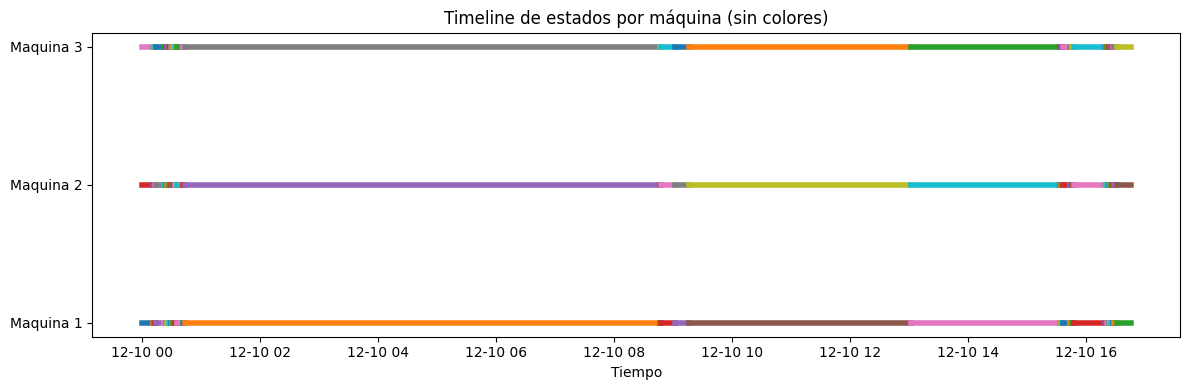

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))

machines = ['Maquina 1', 'Maquina 2', 'Maquina 3']
y_positions = [1, 2, 3]

for machine, y in zip(machines, y_positions):
    sub = df_clean[['timestamp', 'next_timestamp', machine]].dropna()

    for _, row in sub.iterrows():
        ax.plot(
            [row['timestamp'], row['next_timestamp']],  # inicio y fin
            [y, y],                                     # misma altura
            linewidth=4
        )

# -----------------------------
# 4. Ajustes visuales
# -----------------------------
ax.set_yticks(y_positions)
ax.set_yticklabels(machines)
ax.set_xlabel("Tiempo")
ax.set_title("Timeline de estados por máquina (sin colores)")

plt.tight_layout()
plt.show()

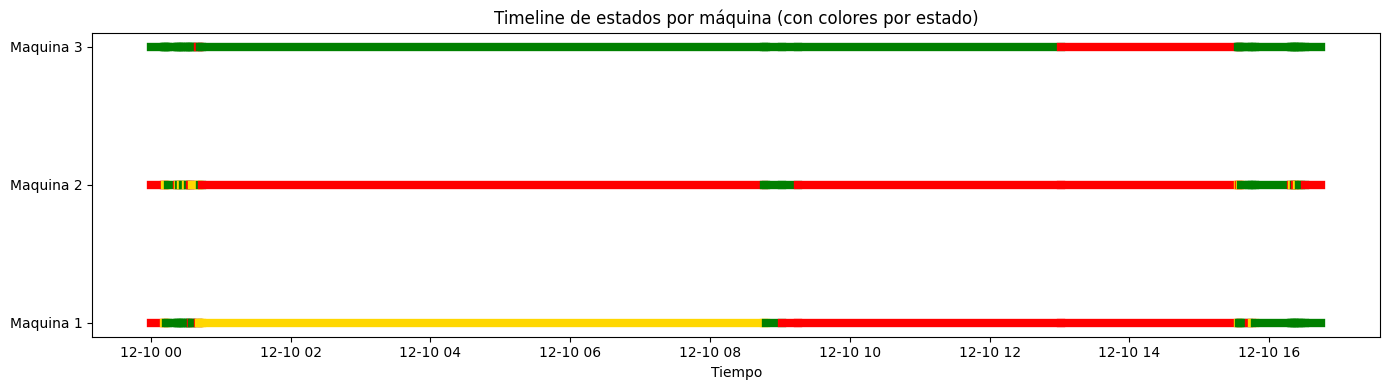

In [ ]:
# -----------------------------
# 3. Colores por estado
# -----------------------------
color_map = {
    1: "green",    # Producción
    2: "red",      # Paro
    3: "gold"      # Preparación
}

# -----------------------------
# 4. Timeline gráfico
# -----------------------------
fig, ax = plt.subplots(figsize=(14,4))

machines = ['Maquina 1', 'Maquina 2', 'Maquina 3']
y_positions = [1, 2, 3]

for machine, y in zip(machines, y_positions):

    sub = df_clean[['timestamp', 'next_timestamp', machine]].dropna()

    for _, row in sub.iterrows():
        estado = row[machine]

        ax.plot(
            [row['timestamp'], row['next_timestamp']],
            [y, y],
            linewidth=6,
            color=color_map.get(estado, "gray")   # color según estado
        )

# -----------------------------
# 5. Ajustes visuales
# -----------------------------
ax.set_yticks(y_positions)
ax.set_yticklabels(machines)

ax.set_xlabel("Tiempo")
ax.set_title("Timeline de estados por máquina (con colores por estado)")

plt.tight_layout()
plt.show()

In [ ]:
df_clean.to_csv("cleanData.csv", index=False)

In [ ]:
# 1. Cargar datos
data = pd.read_csv("P2_2025-12-10_2025-12-10.csv")

# 2. Crear df con datos limpios
data["marcaTemporal"] = pd.to_datetime(data["fecha"] + " " + data["hora"])

dataM1 = data[["marcaTemporal", "Maquina 1"]]
dataM2 = data[["marcaTemporal", "Maquina 2"]]
dataM3 = data[["marcaTemporal", "Maquina 3"]]

# Detectar cambios de estado

for i in [dataM1['Maquina 1']]:
  dataM1["cambio"] = dataM1["Maquina 1"].ne(dataM1["Maquina 1"].shift())

dataM1 = dataM1[dataM1[["cambio"]].any(axis=1)].copy()
dataM1["siguienteMarca"] = dataM1["marcaTemporal"].shift(-1)

for i in [dataM2['Maquina 2']]:
  dataM2["cambio"] = dataM2["Maquina 2"].ne(dataM2["Maquina 2"].shift())

dataM2 = dataM2[dataM2[["cambio"]].any(axis=1)].copy()
dataM2["siguienteMarca"] = dataM2["marcaTemporal"].shift(-1)

for i in [dataM3['Maquina 3']]:
  dataM3["cambio"] = dataM3["Maquina 3"].ne(dataM3["Maquina 3"].shift())

dataM3 = dataM3[dataM3[["cambio"]].any(axis=1)].copy()
dataM3["siguienteMarca"] = dataM3["marcaTemporal"].shift(-1)

/tmp/ipython-input-323807133.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataM1["cambio"] = dataM1["Maquina 1"].ne(dataM1["Maquina 1"].shift())
/tmp/ipython-input-323807133.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataM2["cambio"] = dataM2["Maquina 2"].ne(dataM2["Maquina 2"].shift())
/tmp/ipython-input-323807133.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:

# Convertir a .csv
dataM1.to_csv('dataM1.csv', index=False)
dataM2.to_csv('dataM2.csv', index=False)
dataM3.to_csv('dataM3.csv', index=False)